### 課堂練習 - 程式碼範例

In [4]:
!pip install finlab_crypto > log.txt
import finlab_crypto

finlab_crypto.setup()

import pandas as pd

btc = finlab_crypto.crawler.get_all_binance('BTCUSDT', '1d')
eth = finlab_crypto.crawler.get_all_binance('ETHUSDT', '1d')
bnb = finlab_crypto.crawler.get_all_binance('BNBUSDT', '1d')
df = pd.concat([btc, eth, bnb], keys=['BTC', 'ETH', 'BNB']).reset_index().rename(columns={'level_0': 'name'})

del btc
del eth
del bnb

All caught up..!
All caught up..!
All caught up..!


## DataFrame

In [5]:
df.head()

,name,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
0,BTC,2017-08-17 00:00:00+00:00,4261.48,4485.39,4200.74,4285.08,795.150377,1.503014e+12,3.454770e+06,3427.0,616.248541,2.678216e+06,8733.911395
1,BTC,2017-08-18 00:00:00+00:00,4285.08,4371.52,3938.77,4108.37,1199.888264,1.503101e+12,5.086958e+06,5233.0,972.868710,4.129123e+06,9384.141409
2,BTC,2017-08-19 00:00:00+00:00,4108.37,4184.69,3850.00,4139.98,381.309763,1.503187e+12,1.549484e+06,2153.0,274.336042,1.118002e+06,9184.085529
3,BTC,2017-08-20 00:00:00+00:00,4120.98,4211.08,4032.62,4086.29,467.083022,1.503274e+12,1.930364e+06,2321.0,376.795947,1.557401e+06,10125.414084
4,BTC,2017-08-21 00:00:00+00:00,4069.13,4119.62,3911.79,4016.00,691.743060,1.503360e+12,2.797232e+06,3972.0,557.356107,2.255663e+06,11706.769970


### Q. df從第0筆資料算起，第100筆資料是哪一種加密貨幣的價格資訊？

In [8]:
df.iloc[100]
df.iloc[100].loc['name']

'BTC'

### Q. 請問df中 BTC 的歷史資料有多長？

In [89]:
#True + True + True
#df.name == 'BTC'
(df.name == 'BTC').sum()

3

### Q. df中的加密貨幣每天收盤價的平均是多少？

In [11]:
#df.close
df.close.mean()

6712.209943628333

### Q. 承上題，標準差是多少？

In [13]:
df.close.std()

0       4285.08
1       4108.37
2       4139.98
3       4086.29
4       4016.00
         ...   
4978     430.50
4979     430.20
4980     434.20
4981     442.10
4982     445.20
Name: close, Length: 4983, dtype: float64

### Q. 請從 dataframe 中提取 BTC 的資料（只要BTC）並存到df_btc中

In [95]:
#df.name == 'BTC'
#df[df.name == 'BTC']
df_btc = df[df.name == 'BTC']

### Q. 請繪製 BTC 的收盤價

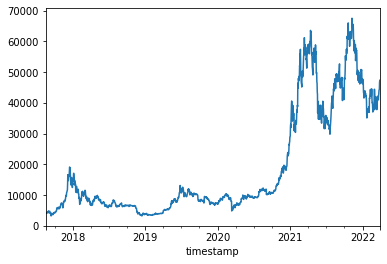

In [96]:
#df_btc.close
#df_btc.close.plot()
#df_btc.set_index('timestamp')
df_btc.set_index('timestamp').close.plot()

### Q. 請將df_btc的開高低收頻率改成「每月」，其他columns可以刪除

In [100]:
df_btc = df_btc.set_index('timestamp')
#df_btc
#df_btc.resample('M').first()
#df_btc.resample('M').max()
#df_btc.resample('M').min()
#df_btc.resample('M').last()
#df_btc.resample('M').sum()

df_btc.resample('M').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

,open,high,low,close,volume
timestamp,,,,,
2017-08-31 00:00:00+00:00,4261.48,4745.42,3400.00,4724.89,1.001564e+04
2017-09-30 00:00:00+00:00,4689.89,4939.19,2817.00,4378.51,2.763419e+04
2017-10-31 00:00:00+00:00,4378.49,6498.01,4110.00,6463.00,4.162639e+04
2017-11-30 00:00:00+00:00,6463.00,11300.03,5325.01,9838.96,1.084880e+05
2017-12-31 00:00:00+00:00,9837.00,19798.68,9380.00,13716.36,4.084767e+05
2018-01-31 00:00:00+00:00,13715.65,17176.24,9035.00,10285.10,8.166756e+05
2018-02-28 00:00:00+00:00,10285.10,11786.01,6000.01,10326.76,1.243941e+06
2018-03-31 00:00:00+00:00,10325.64,11710.00,6600.10,6923.91,1.235326e+06
2018-04-30 00:00:00+00:00,6922.00,9759.82,6430.00,9246.01,1.110964e+06


### Q. 請繪製 BTC 的 100 天移動平均線

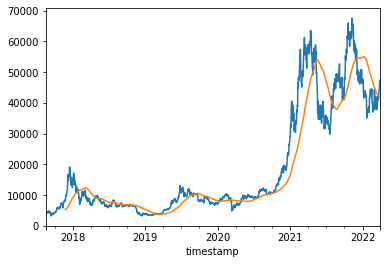

In [101]:
#df_btc.close.mean()
#df_btc.close
#df_btc.close.rolling(100).mean()

btc_mean = df_btc.close.rolling(100).mean()
#btc_mean = df_btc.close.rolling(100).max()

df_btc.close.plot()
btc_mean.plot()

### Q. 請繪製BTC 每年最後一天的收盤價折線圖

In [59]:
#df_btc.close
df_btc.close.resample('Y').last(). # 比較有效 
#df_btc.resample('Y').last()
#df_btc.resample('Y').last().close  # 先 resample 會比較耗時 
#df_btc.close.resample('Y').last() == df_btc.resample('Y').last().close

timestamp
2017-12-31 00:00:00+00:00    True
2018-12-31 00:00:00+00:00    True
2019-12-31 00:00:00+00:00    True
2020-12-31 00:00:00+00:00    True
2021-12-31 00:00:00+00:00    True
2022-12-31 00:00:00+00:00    True
Freq: A-DEC, Name: close, dtype: bool

### Q. 請計算BTC每年的平均價格

In [102]:
df_btc.close.resample('Y').mean()

timestamp
2017-12-31 00:00:00+00:00     7622.664015
2018-12-31 00:00:00+00:00     7538.113945
2019-12-31 00:00:00+00:00     7364.363205
2020-12-31 00:00:00+00:00    11110.548497
2021-12-31 00:00:00+00:00    47400.003041
2022-12-31 00:00:00+00:00    41290.904444
Freq: A-DEC, Name: close, dtype: float64

### Q. 請計算並繪製 BTC 的 100 天標準差

In [103]:
#df_btc.close.std()
#df_btc.close.rolling(100).std()
#df_btc.close.plot()
#df_btc.close.rolling(100).std().plot()  #價格波動大，標準差會較高
btc_std = df_btc.close.rolling(100).std()

### Q. 請計算 BTC 的100日布林通道

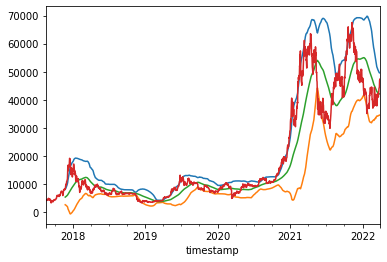

In [104]:
# 布林通道會產生上邊界與下邊界
# 上邊界＝平均值 + 2*標準差
# 下邊界＝平均值 - 2*標準差
#btc_mean = btc_mean.head(500)
#btc_std = btc_std.head(500)
#df_btc = df_btc.head(500)

ub = btc_mean + 2 * btc_std
lb = btc_mean - 2 * btc_std

ub.plot() #blue
lb.plot() #orange
btc_mean.plot() #gree
df_btc.close.plot() #red 會在up與lb之間遊走, 價格下降超過至lb下緣,將有一坡下跌趨勢,價格上升超過至ub上緣,將有一坡上漲趨勢

### Q. BTC 收盤價大於1萬的資料，共有幾筆？

In [90]:
#df_btc.close > 10000
(df_btc.close > 10000).sum()

777

### Q. BTC 在星期幾持有報酬率最高？

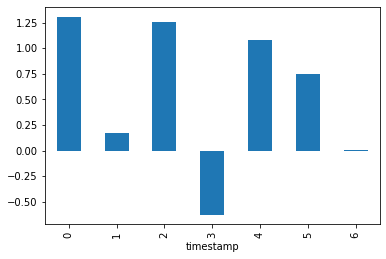

In [117]:
#df_btc
#df_btc.close / df_btc.open - 1. #報酬率
#ret = df_btc.close / df_btc.open - 1
#ret.index
#ret.index.weekday #0:一,1:二..
#ret.groupby(ret.index.weekday).sum()

ret = df_btc.close / df_btc.open - 1
week_ret = ret.groupby(ret.index.weekday).sum()
#week_ret.plot()
week_ret.plot.bar()

### Q. BTC 上漲和下跌的天數？

In [122]:
#df_btc.close
#df_btc.close.shift()
#df_btc.close > df_btc.close.shift()
#(df_btc.close > df_btc.close.shift()).sum()
(df_btc.close > df_btc.close.shift()).sum(), (df_btc.close < df_btc.close.shift()).sum()

(891, 796)

### Q. BTC 最近100天上漲下跌天數？


In [123]:
(df_btc.close > df_btc.close.shift()).tail(100).sum(), (df_btc.close < df_btc.close.shift()).tail(100).sum()

(50, 50)

### Q. BTC 近100日漲幅？


In [127]:
#df_btc.close.iloc[1]
#df_btc.close.iloc[-1]
#df_btc.close.iloc[-101]
df_btc.close.iloc[-1] / df_btc.close.iloc[-101] - 1

-0.035969202624346774

### Q. BTC 近100日最低價格？


In [130]:
#df_btc.low.tail(100)
df_btc.low.tail(100).min()

32917.17

### Q. BTC 近100日最高價格？


In [135]:
df_btc.high.tail(100).max()

52088.0

### Q. BTC 目前價格是否高於100日均價？

In [136]:
df_btc.close.iloc[-1] > df_btc.close.tail(100).mean()

True

42056.5116

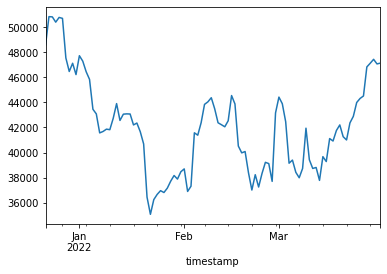

In [137]:
df_btc.close.tail(100).plot()
df_btc.close.tail(100).mean()

### Q. 請從 df 製作一個新表格，columns 為加密貨幣的名稱，index為時間，而表格中的數值為收盤價，叫做df_close

In [138]:
df_close = df.pivot(index='timestamp', columns='name', values='close')
df_close

name,BNB,BTC,ETH
timestamp,,,
2017-08-17 00:00:00+00:00,NaN,4285.08,302.00
2017-08-18 00:00:00+00:00,NaN,4108.37,293.96
2017-08-19 00:00:00+00:00,NaN,4139.98,290.91
2017-08-20 00:00:00+00:00,NaN,4086.29,299.10
2017-08-21 00:00:00+00:00,NaN,4016.00,323.29
...,...,...,...
2022-03-27 00:00:00+00:00,430.5,46827.76,3295.65
2022-03-28 00:00:00+00:00,430.2,47122.21,3332.92
2022-03-29 00:00:00+00:00,434.2,47434.80,3400.51


### Q. 繪製這三種加密貨幣的收盤價於同一張圖上

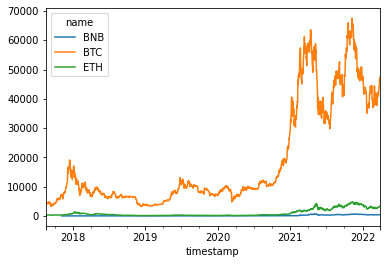

In [139]:
df_close.plot()

### Q. 繪製BTC與ETH，於同一張圖表上（使用secondary_y=True）

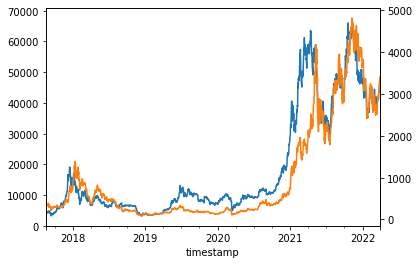

In [143]:
df_close.BTC.plot()
#df_close.ETH.plot()
df_close.ETH.plot(secondary_y=True)

### Q. 繪製三種加密貨幣從2018年開始的報酬率折線圖


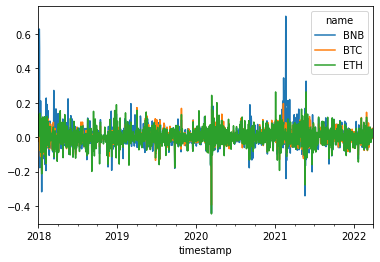

In [147]:
#df_close.pct_change()
#df_close.pct_change().plot()
#df_close.pct_change().loc['2018'].plot()  #只有2018
#df_close.pct_change().loc['2018':].plot()   #2018以後

pct = df_close.pct_change()
pct2018 = pct.loc['2018':]
pct2018.plot()

### Q. 比較三種加密貨幣的每年年報酬（以每年收盤價結算即可）

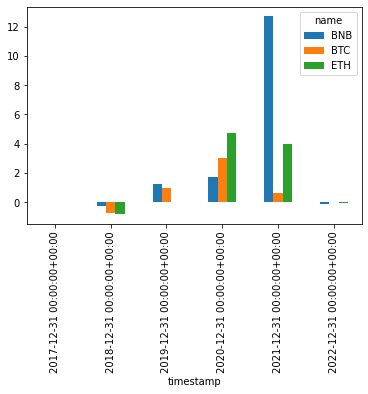

In [156]:
#df_close.resample('Y').last()
#df_close.resample('Y').last().pct_change()
#df_close.resample('Y').last().pct_change().plot()
df_close.resample('Y').last().pct_change().plot.bar()